In [96]:
#import libraries
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [97]:
# Read csv
bdata = pd.read_csv("bank-full.csv")

In [98]:
# Data row and column count
bdata.shape

(45211, 17)

In [99]:
# Show datatypes of data dataframe
bdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [100]:
# More info on data types
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [101]:
# Checking missing values in data
bdata.isnull().values.any()
# No missing values found in data

False

In [102]:
bdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [103]:
# Describe data and it's summary
bdata.describe()
# Column attribute ranges found

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [104]:
# Skewness of data
bdata.skew()
# The distribution of all numerical variables other than age is highly skewed - hence we might need to transform or bin some of these variables

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [105]:
# Duration highly impacts the outcome, but it is not known before the call and is known after the call.
# Not related to customer attributes.
# Should be used for benchmarking only.
bdata.drop(['duration'], inplace=True, axis=1)  

In [106]:
# Some variables are more relevant when categorical
bdata['day']=bdata['day'].astype('category')
bdata['Target']=bdata['Target'].astype('category')

# 1. Exploratory Data Analysis - Univariate - Count plot, Box plot and Histogram

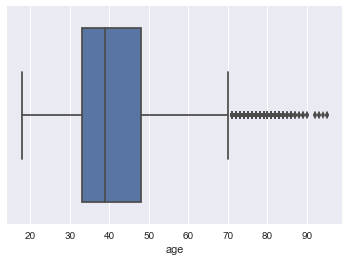

In [107]:
sns.boxplot(x=bdata['age'], data=bdata)
# Age data has median value of about 38yrs. The outliers in higher age group above 90 may be incorrect data.

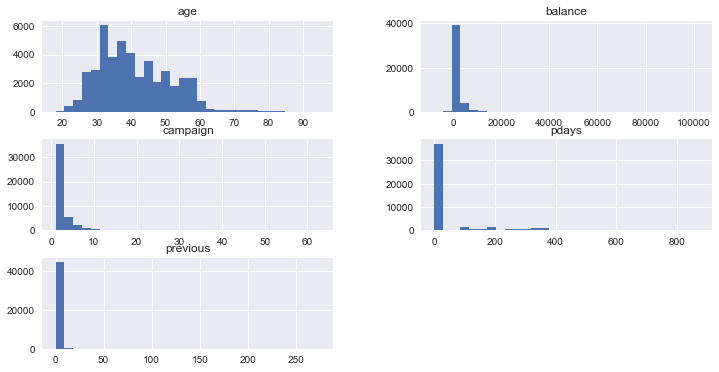

In [108]:
# Histograms show that the data except for age is highly skewed
columns = list(bdata) # Excluding Outcome column which has only 
bdata[columns].hist(stacked=False, bins=30, figsize=(12,30), layout=(14,2)); 

In [109]:
bdata['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

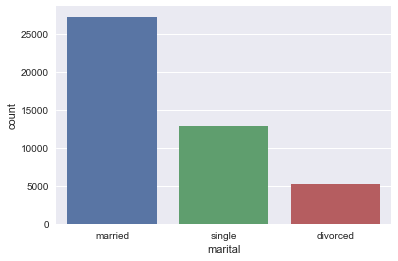

In [110]:
sns.countplot(bdata['marital'])

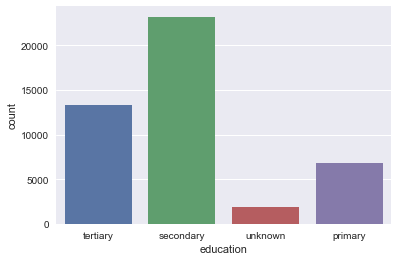

In [111]:
sns.countplot(bdata['education'])

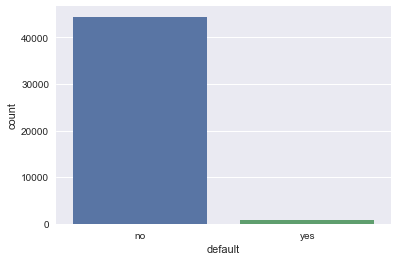

In [112]:
sns.countplot(bdata['default'])   
# Not a good predictor so can be dropped

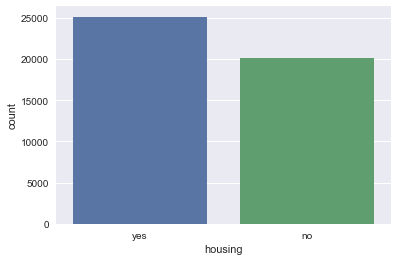

In [113]:
sns.countplot(bdata['housing'])

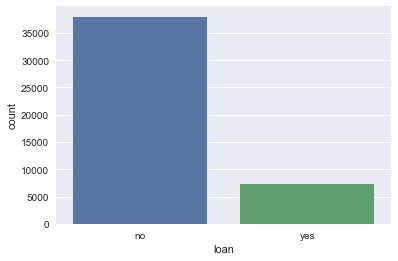

In [114]:
sns.countplot(bdata['loan'])

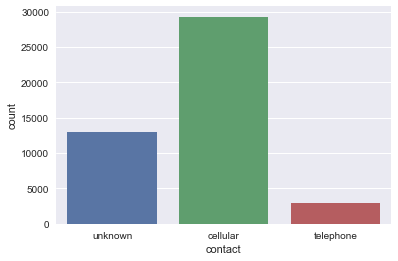

In [115]:
sns.countplot(bdata['contact'])

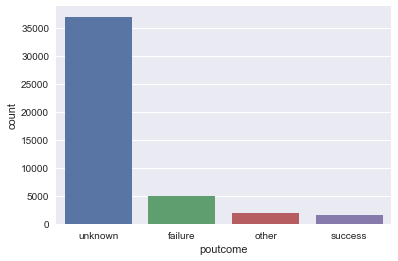

In [116]:
sns.countplot(bdata['poutcome'])

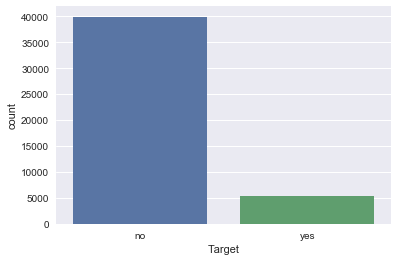

In [117]:
sns.countplot(bdata['Target'])

In [118]:
## Normalise target data
bdata['Target'].value_counts(normalize=True)
# The success rate is 11.69%. Accuracy will not be a relevant measure for this scenario.
# False negative is very expensive because a false negative is a customer who will potentially take a loan but who has been classified wrongly. 
# Most relevant model performance measure is recall.

no     0.883015
yes    0.116985
Name: Target, dtype: float64

# Bivariate analysis - Pairplots and Correlation

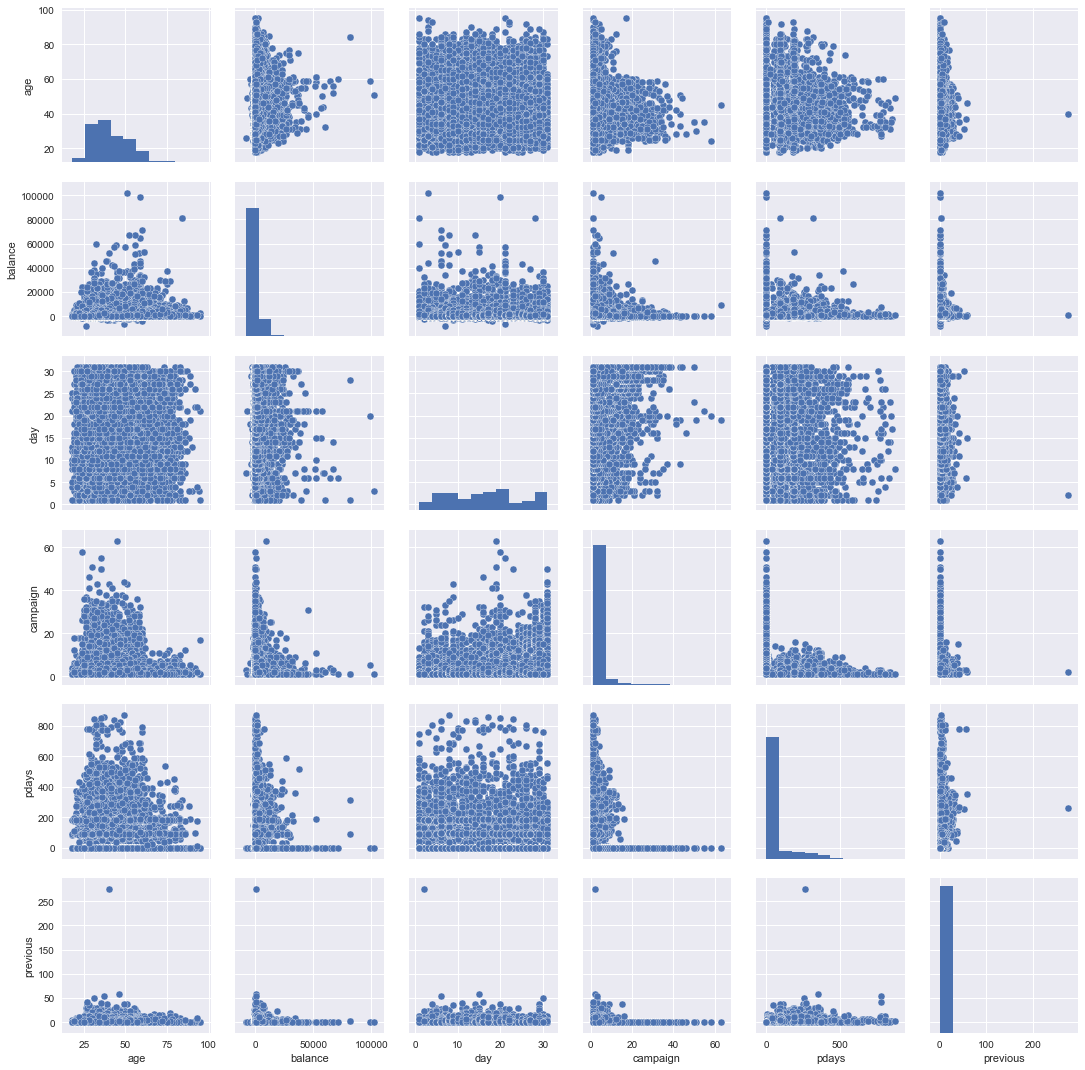

In [119]:
#Pairplots
sns.pairplot(bdata)

In [120]:
#Grouping of numerical variables by mean for different groups
np.round(bdata.groupby(['Target']).mean() ,1)
# Mean Age is slightly higher for Target value yes
# Mean Balance is significantly higher as well
# Further those who have been contacted frequently before the campaign tend to subscribe for the term deposit

,age,balance,campaign,pdays,previous
Target,,,,,
no,40.8,1303.7,2.8,36.4,0.5
yes,41.7,1804.3,2.1,68.7,1.2


In [121]:
# Crosstab report to show percentage of success or failure (target yes or no) for job variable values
pd.crosstab(bdata['job'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False )
# Students have very high success rates (28.6%) while blue-collar workers have very low success rates(7.2%).

Target,no,yes
job,,
student,0.713220,0.286780
retired,0.772085,0.227915
unemployed,0.844973,0.155027
management,0.862444,0.137556
admin.,0.877973,0.122027
self-employed,0.881571,0.118429
unknown,0.881944,0.118056
technician,0.889430,0.110570
services,0.911170,0.088830


In [122]:
# Crosstab report based on marital status
pd.crosstab(bdata['marital'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False )
# Highest success rates is for Singles and lowest for Married

Target,no,yes
marital,,
single,0.850508,0.149492
divorced,0.880545,0.119455
married,0.898765,0.101235


In [123]:
# Crosstab report based on education status
pd.crosstab(bdata['education'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False)
# Highest success rate for tertiary educated at 15%                

Target,no,yes
education,,
tertiary,0.849936,0.150064
unknown,0.864297,0.135703
secondary,0.894406,0.105594
primary,0.913735,0.086265


In [124]:
# Crosstab bsased on loan
pd.crosstab(bdata['loan'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [125]:
# Crosstab based on housing
pd.crosstab(bdata['housing'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False )
# There are more chances for those who do not have housing loan

Target,no,yes
housing,,
no,0.832976,0.167024
yes,0.923000,0.077000


In [126]:
pd.crosstab(bdata['loan'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False )
# Those who do not have personal loan are twice as likely (12%) to have a term deposit 

Target,no,yes
loan,,
no,0.873443,0.126557
yes,0.933186,0.066814


In [127]:
# Crosstab report by month
pd.crosstab(bdata['month'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False )
# Maximum deposits are done in March and Dec

Target,no,yes
month,,
mar,0.480084,0.519916
dec,0.532710,0.467290
sep,0.535406,0.464594
oct,0.562331,0.437669
apr,0.803206,0.196794
feb,0.833522,0.166478
aug,0.889867,0.110133
jun,0.897772,0.102228
nov,0.898489,0.101511


In [128]:
# Which day of the month has the maximum chances 
pd.crosstab(bdata['day'], bdata['Target'], normalize='index').sort_values(by='yes',ascending=False )
# It may be better to contact the prospects in the earlier or later part of the month

Target,no,yes
day,,
1,0.720497,0.279503
10,0.769084,0.230916
30,0.826948,0.173052
22,0.829834,0.170166
3,0.835032,0.164968
4,0.840830,0.159170
25,0.841667,0.158333
12,0.847785,0.152215
13,0.847950,0.152050


In [129]:
# It will show correlation matrix 
bdata.corr() 


,age,balance,campaign,pdays,previous
age,1.000000,0.097783,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,-0.014578,0.003435,0.016674
campaign,0.004760,-0.014578,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.032855,0.454820,1.000000


In [130]:
## Function for finding the optimal number of bins 

In [131]:
#Binning function, to convert numerical continuous variables to categorical variables
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [132]:
#Binning balances
cut_points = [0,500,1000, 1500,2000]
labels = ["very low","low","medium","high", "very high", "highest"]
bdata['balance_range'] = binning(bdata['balance'], cut_points, labels)
bdata['balance_range'].value_counts()
bdata.drop(['balance'], axis=1, inplace=True)

In [133]:
#Binning campaign in bins of upto 2, 3, 4, and greater than 4
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
bdata['campaign_range'] = binning(bdata['campaign'], cut_points, labels)
bdata['campaign_range'].value_counts()
bdata.drop(['campaign'], axis=1, inplace=True)

In [134]:
X = bdata.drop('Target' , axis=1)
y = bdata['Target']   # To select all rows and the last column which is the classification "Yes", "No"
X = pd.get_dummies(X, drop_first=True)

In [135]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [136]:
X_train.shape,X_test.shape

((31647, 76), (13564, 76))

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [138]:
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [139]:
# Is the model an overfit model? 
y_pred = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))
# Decision tree is prone to easily overfitting, but with ensemble techniques and different iterations we can try to cancel the effect of overfitting

0.998767655702
0.838100855205


In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred,average="binary", pos_label="yes"))
# Low recall rate has to be improved

[[10884  1146]
 [ 1050   484]]
0.838100855205
0.315514993481


In [141]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [142]:
# Graphviz and Pydotplus is necessary for visualisation of tree 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
#import graphviz


feature_cols = X_train.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('bank_pruned.png')
#Image(graph.create_png())

In [143]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
poutcome_success,0.652601
contact_unknown,0.202537
housing_yes,0.121260
month_oct,0.014702
month_sep,0.005419
pdays,0.003482
day_23,0.000000
day_24,0.000000
day_25,0.000000
day_26,0.000000


In [144]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)


In [145]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned, average="binary", pos_label="yes")

In [146]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
# Overfitting is reduced after pruning but recall is reduced a lot

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941


In [147]:
## Apply the Random forest model and print the accuracy of Random forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [148]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary", pos_label="yes")

In [149]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.889929,0.204694


In [150]:
## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.


from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [151]:
pred_AB = abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, pos_label='yes')

In [152]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall':[recall_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.889929,0.204694
0,Adaboost,0.893689,0.151890


In [153]:
## Apply Bagging Classifier Algorithm and print the accuracy


from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [154]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, pos_label='yes')

In [155]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall':[recall_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.889929,0.204694
0,Adaboost,0.893689,0.151890
0,Bagging,0.889708,0.238592


In [156]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [157]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, pos_label='yes')

In [158]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall':[recall_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.893689,0.134941
0,Random Forest,0.889929,0.204694
0,Adaboost,0.893689,0.151890
0,Bagging,0.889708,0.238592
0,Gradient Boost,0.894426,0.214472


# Bagging gives best model performance overall
# However the recall is still very low at around 23.8%